In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [37]:
df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [38]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Ticket', 'Cabin', 'Embarked',  'Parch'], axis = 1, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [40]:
df[df.Age.isna()] 

,Survived,Pclass,Sex,Age,Fare
5,0,3,male,NaN,8.4583
17,1,2,male,NaN,13.0000
19,1,3,female,NaN,7.2250
26,0,3,male,NaN,7.2250
28,1,3,female,NaN,7.8792
...,...,...,...,...,...
859,0,3,male,NaN,7.2292
863,0,3,female,NaN,69.5500
868,0,3,male,NaN,9.5000
878,0,3,male,NaN,7.8958


In [41]:
df.Age.mean()

29.69911764705882

In [42]:
df.Age.std()

14.526497332334042

In [43]:
df.Age.min()

0.42

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

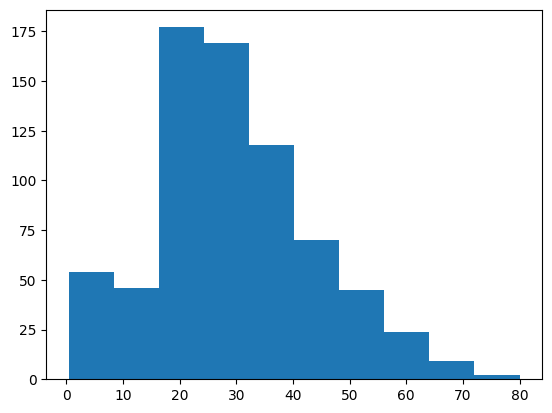

In [44]:
plt.hist(x = df['Age'])

In [46]:
df.loc[df.Age.isna(), 'Age'] = df.Age.mean().astype('int64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [53]:
y = df.Survived

In [56]:
df.drop(['Survived'], axis = 1, inplace = True)

In [59]:
le = LabelEncoder()

In [62]:
df['sex_lables'] = le.fit_transform(df['Sex'])

In [65]:
df.drop(['Sex'], axis = 1, inplace = True)

In [70]:
X = df

In [96]:
X

,Pclass,Age,Fare,sex_lables
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,29.0,23.4500,0
889,1,26.0,30.0000,1


In [126]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3)

In [127]:
model = tree.DecisionTreeClassifier()

In [128]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
model.score(X_test,y_test) * 100 

81.34328358208955

In [130]:
model.predict_proba([[2, 1, 45, 1]])

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [131]:
y_pred = model.predict(X_test)

Text(50.722222222222214, 0.5, 'Predicted')

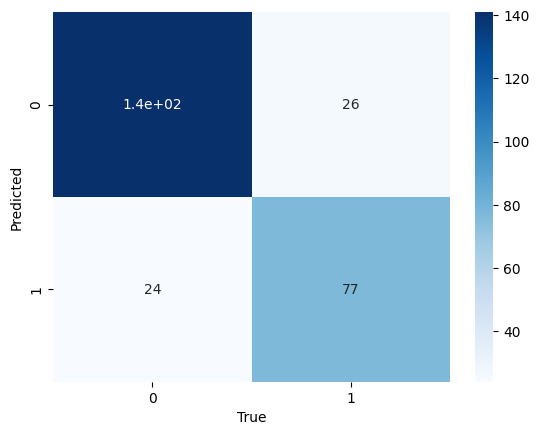

In [132]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Blues', annot = True)
plt.xlabel('True')
plt.ylabel('Predicted')